In [20]:
from matplotlib import pyplot as plt
from pathlib import Path
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
sns.set_theme(style="whitegrid")

In [21]:
models_name = ['BFD_enc', 'BFD_gray', 'BFD_rgb', 'ChaLearn_enc', 'ChaLearn_gray', 'ChaLearn_rgb']

In [59]:
def mean_results(foldperf, model_name):
    testl_f,tl_f,testa_f,ta_f,testa_f2,ta_f2,testa_f_ocean,ta_f_ocean=[],[],[],[],[],[],[],[]
    k=10
    for f in range(1,k+1):

        tl_f.append(foldperf['fold{}'.format(f)]['train_loss'][-1])
        testl_f.append(foldperf['fold{}'.format(f)]['test_loss'][-1])

        ta_f.append(foldperf['fold{}'.format(f)]['train_acc'][-1])
        testa_f.append(foldperf['fold{}'.format(f)]['test_acc'][-1])

        ta_f2.append(foldperf['fold{}'.format(f)]['train_acc_2'][-1])
        testa_f2.append(foldperf['fold{}'.format(f)]['test_acc_2'][-1])

        ta_f_ocean.append(foldperf['fold{}'.format(f)]['train_acc_ocean'][-1])
        testa_f_ocean.append(foldperf['fold{}'.format(f)]['test_acc_ocean'][-1])

    print(f'{model_name} Results:')
    print("AVG Train Loss: {:.3f} \t AVG Test Loss: {:.3f} \n \
AVG Train Acc: {:.2f} \t AVG Test Acc: {:.2f} \n \
AVG Train Acc: {:.2f} \t AVG Test Acc: {:.2f} \n \
AVG Train Acc: {} \t AVG Test Acc: {} \
    ".format(np.mean(tl_f), np.mean(testl_f),
            np.mean(ta_f),np.mean(testa_f),
            np.mean(ta_f2),np.mean(testa_f2),
            np.mean(ta_f_ocean, axis=0),np.mean(testa_f_ocean, axis=0)))  
    
    results = {}
    results['train_loss'] = []
    results['test_loss'] = []
    results['train_acc'] = []
    results['test_acc'] = []
    results['train_acc_2'] = []
    results['test_acc_2'] = []

    for f in range(1,k+1):
        for result_type in results.keys():
            results[result_type].append(foldperf[f'fold{f}'][result_type])
    
    new_results = {}    
    for result_type in results.keys():
        new_results[f'{result_type}_std'] = np.array(results[result_type]).std(axis=0)
        new_results[result_type] = np.array(results[result_type]).mean(axis=0)
        
    return pd.DataFrame(new_results)   

In [55]:
def plot_results(results, plot_data):
    epochs = results[f'test_{plot_data}'].shape[0]
    plt.figure(figsize=(15,6))
    ax = sns.lineplot(data=results[[f'train_{plot_data}', f'test_{plot_data}']], markers=True, dashes=False, markersize=10)
    ax.fill_between(np.arange(1, epochs+1), y1=results[f'train_{plot_data}'] - results[f'train_{plot_data}_std'], y2=results[f'train_{plot_data}'] + results[f'train_{plot_data}_std'], alpha=.3)
    ax.fill_between(np.arange(1, epochs+1), y1=results[f'test_{plot_data}'] - results[f'test_{plot_data}_std'], y2=results[f'test_{plot_data}'] + results[f'test_{plot_data}_std'], alpha=.3)
    ax.set(xlim=(1-epochs/50, epochs+epochs/50))
    xticks = list(np.linspace(1,epochs+1, np.min([epochs, 12])).astype(np.int64)[:-1])
    xticks.append(epochs)
    ax.set_xticks(xticks)
    ax.set_xlabel('Nr epoki')
    ax.set_ylabel('Wartość funkcji straty')
    ax.legend
    title = 'PPD_' + model_name.split('_')[1] if model_name.split('_')[0] == 'ChaLearn' else model_name
    plt.title(title)
    plt.legend(title='Zbiór', loc='upper right', labels=['treningowy', 'testowy'])
    plt.show()

In [56]:
sns.set_palette('viridis',2, 1)
sns.color_palette('viridis',2, 1)

[(0.190631, 0.4070609999999999, 0.556089),
 (0.20802999999999994, 0.718701, 0.47287299999999993)]

BFD_enc Results:
AVG Train Loss: 0.604 	 AVG Test Loss: 0.586 
 AVG Train Acc: 67.34 	 AVG Test Acc: 71.45 
 AVG Train Acc: 61.90 	 AVG Test Acc: 65.66 
 AVG Train Acc: [69.06565475 68.83838348 71.71717072 65.83333435 61.23737297] 	 AVG Test Acc: [76.59091072 71.81818314 73.40909271 71.5909111  63.86363754]     


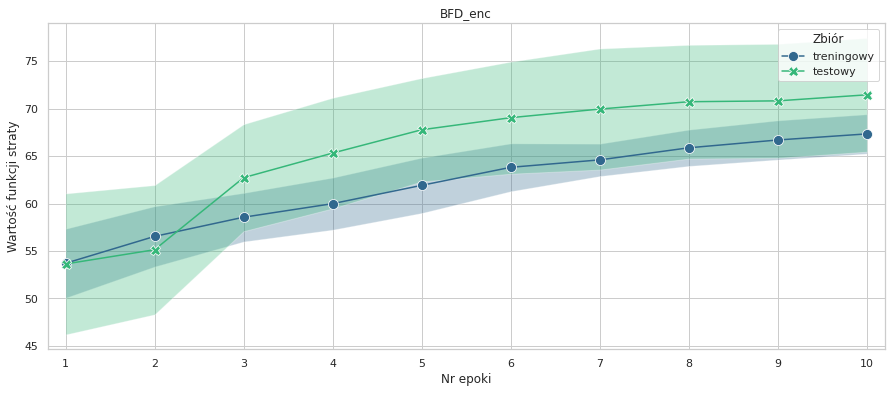

KeyError: 'train_acc_ocean'

In [60]:
plot_data = 'acc' # acc - poprawny, acc_2 - sumujący poprzednie epoki
for model_name in models_name:
    dict_path = f'results/{model_name}.pkl'
    result_file = open(dict_path, "rb")
    foldperf = pickle.load(result_file)
    results = mean_results(foldperf, model_name)
    results.set_index(np.arange(1, results.shape[0]+1), inplace=True)
    # break
    plot_results(results, plot_data)